In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kakr-4th-competition/sample_submission.csv
/kaggle/input/kakr-4th-competition/train.csv
/kaggle/input/kakr-4th-competition/test.csv


# 1. 데이터 전처리

In [55]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

## 1.1 CSV 파일 불러오기

In [56]:
train = pd.read_csv('/kaggle/input/kakr-4th-competition/train.csv')
train.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States,>50K
1,1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States,<=50K
2,2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States,<=50K
3,3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States,<=50K
4,4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?,<=50K


In [57]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              26049 non-null  int64 
 1   age             26049 non-null  int64 
 2   workclass       26049 non-null  object
 3   fnlwgt          26049 non-null  int64 
 4   education       26049 non-null  object
 5   education_num   26049 non-null  int64 
 6   marital_status  26049 non-null  object
 7   occupation      26049 non-null  object
 8   relationship    26049 non-null  object
 9   race            26049 non-null  object
 10  sex             26049 non-null  object
 11  capital_gain    26049 non-null  int64 
 12  capital_loss    26049 non-null  int64 
 13  hours_per_week  26049 non-null  int64 
 14  native_country  26049 non-null  object
 15  income          26049 non-null  object
dtypes: int64(7), object(9)
memory usage: 3.2+ MB


In [58]:
train.describe()

,id,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,13024.000000,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,7519.842917,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,0.000000,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,6512.000000,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,13024.000000,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,19536.000000,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,26048.000000,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [59]:
label = train['income']

del train['income']

test = pd.read_csv("/kaggle/input/kakr-4th-competition/test.csv")

In [60]:
test.head()

,id,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


In [61]:
# 라벨 값 인코딩
label = label.map(lambda x: 1 if x == '>50K' else 0)

In [62]:
label.head()

0    1
1    0
2    0
3    0
4    0
Name: income, dtype: int64

* ID 컬럼은 행의 식별자로 필요 없는 컬럼이므로 삭제

In [63]:
del train['id']
del test['id']

In [64]:
tmp_train = train.copy()
tmp_test  = test.copy()

## 1.2 데이터 확인
* .head(), .describe(), .info() 등의 함수로 데이터를 확인

In [65]:
tmp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,60,United-States
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,20,United-States
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,0,0,16,United-States
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,25,United-States
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,0,0,20,?


In [66]:
tmp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26049 entries, 0 to 26048
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             26049 non-null  int64 
 1   workclass       26049 non-null  object
 2   fnlwgt          26049 non-null  int64 
 3   education       26049 non-null  object
 4   education_num   26049 non-null  int64 
 5   marital_status  26049 non-null  object
 6   occupation      26049 non-null  object
 7   relationship    26049 non-null  object
 8   race            26049 non-null  object
 9   sex             26049 non-null  object
 10  capital_gain    26049 non-null  int64 
 11  capital_loss    26049 non-null  int64 
 12  hours_per_week  26049 non-null  int64 
 13  native_country  26049 non-null  object
dtypes: int64(6), object(8)
memory usage: 2.8+ MB


In [67]:
tmp_train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,26049.000000,2.604900e+04,26049.000000,26049.00000,26049.000000,26049.000000
mean,38.569235,1.903045e+05,10.088372,1087.68970,87.732734,40.443126
std,13.671489,1.059663e+05,2.567610,7388.85469,403.230205,12.361850
min,17.000000,1.376900e+04,1.000000,0.00000,0.000000,1.000000
25%,28.000000,1.181080e+05,9.000000,0.00000,0.000000,40.000000
50%,37.000000,1.788660e+05,10.000000,0.00000,0.000000,40.000000
75%,48.000000,2.377350e+05,12.000000,0.00000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.00000,4356.000000,99.000000


In [68]:
tmp_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,0,0,40,United-States
1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,25,United-States
3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States
4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,99,France


## 1.3 결측치 처리
* 일반적인 결측치와 다르게 '?'로 표현되어 있는 값들은 해당 컬럼의 최빈값으로 결측치 처리를 진행
* 범주형 변수의 경우 가장 간단하게 최빈값으로 결측치 처리를 할 수 있지만, 다른 컬럼을 필터링해서 결측치 처리를 할수도 있다.

In [69]:
has_na_columns = ['workclass', 'occupation', 'native_country']

In [70]:
(tmp_train[has_na_columns] == '?').sum()

workclass         1502
occupation        1508
native_country     456
dtype: int64

In [71]:
for c in has_na_columns:
    tmp_train.loc[train[c] == '?', c] = train[c].mode()[0]
    tmp_test.loc[test[c]   == '?', c] = test[c].mode()[0]

In [72]:
(tmp_train[has_na_columns] == '?').sum()

workclass         0
occupation        0
native_country    0
dtype: int64

## 1.4 Log 변환
* capital_gain 변수와 capital_loss 변수의 분포가 한쪽으로 치우친 형태이므로 Log 변환을 통해 분포의 형태를 조정

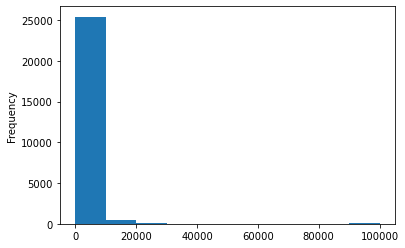

In [73]:
tmp_train['capital_gain'].plot.hist()

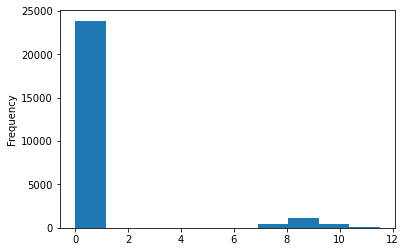

In [74]:
tmp_train['log_capital_gain'] = train['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)
tmp_test['log_capital_gain']  = test['capital_gain'].map(lambda x : np.log(x) if x != 0 else 0)

tmp_train['log_capital_gain'].plot.hist()

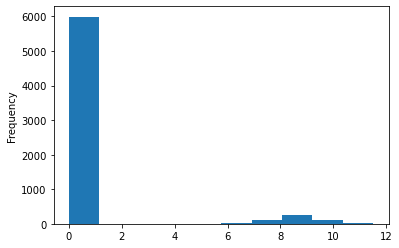

In [75]:
tmp_test['log_capital_gain'].plot.hist()

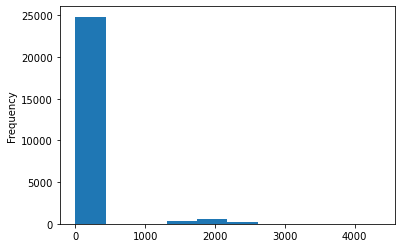

In [76]:
train['capital_loss'].plot.hist()

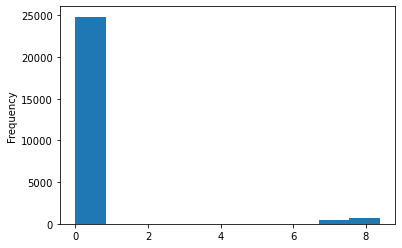

In [77]:
tmp_train['log_capital_loss'] = train['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)
tmp_test['log_capital_loss'] = test['capital_loss'].map(lambda x : np.log(x) if x != 0 else 0)

tmp_train['log_capital_loss'].plot.hist()

In [78]:
tmp_train = tmp_train.drop(columns=['capital_loss','capital_gain'])
tmp_test  = tmp_test.drop(columns=['capital_loss', 'capital_gain'])

In [79]:
tmp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,log_capital_gain,log_capital_loss
0,40,Private,168538,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,60,United-States,0.0,0.0
1,17,Private,101626,9th,5,Never-married,Machine-op-inspct,Own-child,White,Male,20,United-States,0.0,0.0
2,18,Private,353358,Some-college,10,Never-married,Other-service,Own-child,White,Male,16,United-States,0.0,0.0
3,21,Private,151158,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,25,United-States,0.0,0.0
4,24,Private,122234,Some-college,10,Never-married,Adm-clerical,Not-in-family,Black,Female,20,United-States,0.0,0.0


In [80]:
tmp_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,log_capital_gain,log_capital_loss
0,28,Private,67661,Some-college,10,Never-married,Adm-clerical,Other-relative,White,Female,40,United-States,0.0,0.0
1,40,Self-emp-inc,37869,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,0.0,0.0
2,20,Private,109952,Some-college,10,Never-married,Handlers-cleaners,Own-child,White,Male,25,United-States,0.0,0.0
3,40,Private,114537,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,50,United-States,0.0,0.0
4,37,Private,51264,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,99,France,0.0,0.0


## 1.5 데이터 쪼개기

In [81]:
from sklearn.model_selection import train_test_split

tmp_train, tmp_valid, y_train, y_valid = train_test_split(tmp_train, label, test_size=0.3, random_state=2020, shuffle=True, stratify=label)

In [82]:
tmp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,log_capital_gain,log_capital_loss
1083,43,Private,484861,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,38,United-States,8.309923,0.0
18663,42,Private,134509,Some-college,10,Never-married,Transport-moving,Unmarried,Black,Female,40,United-States,0.000000,0.0
13501,40,Private,176716,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,0.000000,0.0
11930,29,Private,224858,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,United-States,0.000000,0.0
17495,21,Private,143062,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,40,United-States,0.000000,0.0


* 인덱스 초기화

In [83]:
tmp_train = tmp_train.reset_index(drop=True)
tmp_valid = tmp_valid.reset_index(drop=True)
tmp_test  = tmp_test.reset_index(drop=True)

In [84]:
tmp_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,log_capital_gain,log_capital_loss
0,43,Private,484861,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,38,United-States,8.309923,0.0
1,42,Private,134509,Some-college,10,Never-married,Transport-moving,Unmarried,Black,Female,40,United-States,0.000000,0.0
2,40,Private,176716,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,40,United-States,0.000000,0.0
3,29,Private,224858,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,45,United-States,0.000000,0.0
4,21,Private,143062,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,40,United-States,0.000000,0.0


## 1.6 스케일링
* Scikit-learn 라이브러리에 있는 Standard Scaler를 사용해서 수치형 변수들의 표준화를 진행